In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('preprocessed_data.csv')
df.head()

,date,holiday,total_power_consumption,temp_mean
0,2011-11-23,0,90.39,8.46
1,2011-11-24,0,213.41,10.12
2,2011-11-25,0,303.99,8.48
3,2011-11-26,0,420.98,12.28
4,2011-11-27,0,444.88,7.42


In [3]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

In [4]:
#assign the frequency to index
df.index.freq = 'D'

#split train and test 
test_n = 100
train = df.total_power_consumption.iloc[:-test_n]
test = df.total_power_consumption[-test_n:] 

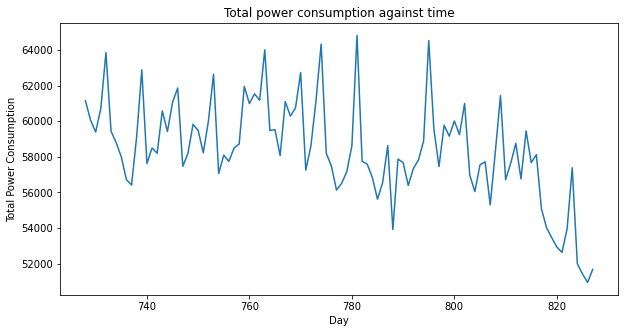

In [5]:
test.plot(figsize=(10,5))
plt.xlabel("Day")
plt.ylabel("Total Power Consumption")
plt.title("Total power consumption against time")
plt.show()

# Simple Exponential Smoothing

In [6]:
ses_fit = SimpleExpSmoothing(train, initialization_method="estimated").fit()
ses_fcast = ses_fit.forecast(test_n).rename(r'$\alpha=%s$'%ses_fit.model.params['smoothing_level'])

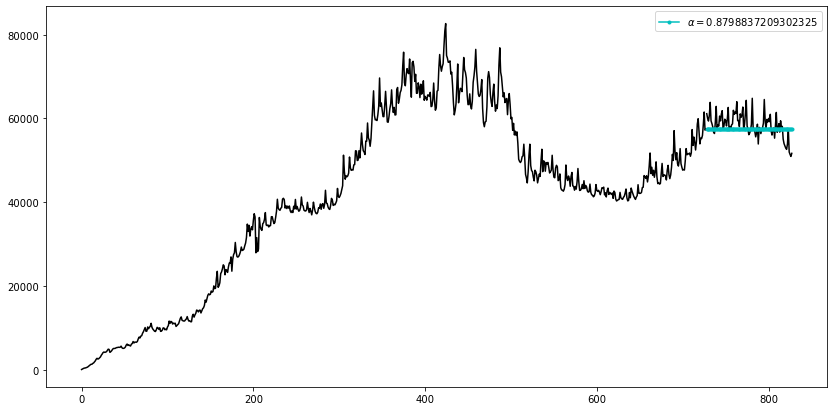

In [7]:
plt.figure(figsize=(14,7))
plt.plot(train, color='k')
plt.plot(test, color='k')
ses_line, = plt.plot(ses_fcast, marker='.', color='c')
plt.legend([ses_line], [ses_fcast.name])
#plt.plot(ses_fit.fittedvalues, color='m') #check the fitted data for training

In [8]:
ses_fit.summary()

Dep. Variable:,total_power_consumption,No. Observations:,728
Model:,SimpleExpSmoothing,SSE,3039783353.537
Optimized:,True,AIC,11102.179
Trend:,None,BIC,11111.359
Seasonal:,None,AICC,11102.234
Seasonal Periods:,None,Date:,"Sun, 04 Apr 2021"
Box-Cox:,False,Time:,15:48:19
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8798837,alpha,True
initial_level,4.4826667,l.0,True


# Holt's Method

In [9]:
holt_fit = Holt(train, initialization_method="estimated").fit()
holt_fcast = holt_fit.forecast(test_n).rename(r'$\alpha$=%s, $\beta$=%s' % (holt_fit.model.params['smoothing_level'],holt_fit.model.params['smoothing_trend']))

C:\Users\ADMIN\miniconda3\envs\power-usage-forecasting-labs\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


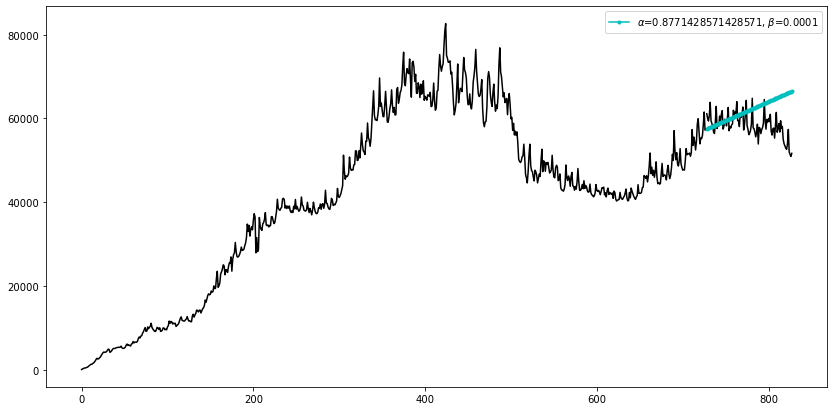

In [10]:
plt.figure(figsize=(14,7))
plt.plot(train, color='k')
plt.plot(test, color='k')
holt_line, = plt.plot(holt_fcast, marker='.', color='c')
plt.legend([holt_line], [holt_fcast.name])
#plt.plot(holt_fit.fittedvalues, color='m')

In [11]:
holt_fit.summary()

Dep. Variable:,total_power_consumption,No. Observations:,728
Model:,Holt,SSE,3034408647.646
Optimized:,True,AIC,11104.890
Trend:,Additive,BIC,11123.252
Seasonal:,None,AICC,11105.007
Seasonal Periods:,None,Date:,"Sun, 04 Apr 2021"
Box-Cox:,False,Time:,15:48:19
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8771429,alpha,True
smoothing_trend,0.0001,beta,True


The model did very bad when we set exponential=True, damped_trend=True or exponential=True. This is reasonable as our data is an additive model, not a multiplicative model.

# Holt's Winter

We are setting the seasonal_periods explicitly to be 7 since we know that the data cycle is weekly and the frequency is of the data is daily. 

In [12]:
holt_winter_fit = ExponentialSmoothing(train, seasonal_periods=7, trend='add', seasonal='mul').fit() #choose trend='add', seasonal='mul' after trial and error
holt_winter_fcast = holt_winter_fit.forecast(test_n).rename(r'$\alpha$=%s, $\beta$=%s, $\gamma$=%s' % (holt_winter_fit.model.params['smoothing_level'],holt_winter_fit.model.params['smoothing_trend'], holt_winter_fit.model.params['smoothing_seasonal']))

C:\Users\ADMIN\miniconda3\envs\power-usage-forecasting-labs\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\ADMIN\miniconda3\envs\power-usage-forecasting-labs\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


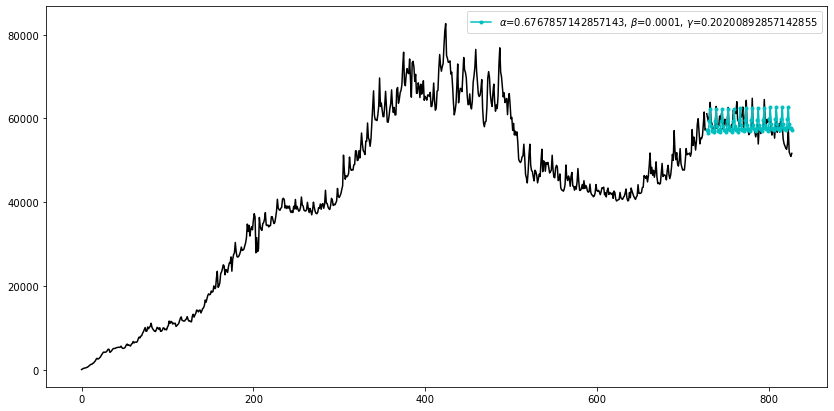

In [13]:
plt.figure(figsize=(14,7))
plt.plot(train, color='k')
plt.plot(test, color='k')
holt_winter_line, = plt.plot(holt_winter_fcast, marker='.', color='c')
plt.legend([holt_winter_line], [holt_winter_fcast.name])
#plt.plot(holt_winter_fit.fittedvalues, color='m')

In [14]:
holt_winter_fit.summary()

Dep. Variable:,total_power_consumption,No. Observations:,728
Model:,ExponentialSmoothing,SSE,2212863069.419
Optimized:,True,AIC,10889.039
Trend:,Additive,BIC,10939.533
Seasonal:,Multiplicative,AICC,10889.549
Seasonal Periods:,7,Date:,"Sun, 04 Apr 2021"
Box-Cox:,False,Time:,15:48:20
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6767857,alpha,True
smoothing_trend,0.0001,beta,True


# Loss

We used RMSE to evaluate the result from our models (SES, Holt's and Holt's Winter).

In [15]:
#create rmse function
def rmse(predicted_val, true):
    return np.sqrt(np.mean((predicted_val - true)**2))

In [16]:
#SES
ses_train_error = rmse(ses_fit.fittedvalues, train)
ses_test_error = rmse(ses_fcast, test)
print("SES")
print(f"Training set error: {ses_train_error}, Test set error: {ses_test_error}")

#Holt's
holt_train_error = rmse(holt_fit.fittedvalues, train)
holt_test_error = rmse(holt_fcast, test)
print("Holt's")
print(f"Training set error: {holt_train_error}, Test set error: {holt_test_error}")

#Holt's Winter
holt_winter_train_error = rmse(holt_winter_fit.fittedvalues, train)
holt_winter_test_error = rmse(holt_winter_fcast, test)
print("Holt's Winter")
print(f"Training set error: {holt_winter_train_error}, Test set error: {holt_winter_test_error}")

SES
Training set error: 2043.4105276542425, Test set error: 2967.93003837298
Holt's
Training set error: 2041.6032295152668, Test set error: 5976.555608451693
Holt's Winter
Training set error: 1743.458365828443, Test set error: 2674.475679141902


# Additional

In [17]:
#extra test for holt's winter
#trend='add', seasonal='mul' gets the best result from all
fit2 = ExponentialSmoothing(train, seasonal_periods=7, trend='add', seasonal='add').fit()
fcast2 = fit2.forecast(test_n).rename("trend-add_seasonal-mul")

fit3 = ExponentialSmoothing(train, seasonal_periods=7, trend='mul', seasonal='add').fit()
fcast3 = fit3.forecast(test_n).rename("trend-mul_seasonal-add")

fit4 = ExponentialSmoothing(train, seasonal_periods=7, trend='mul', seasonal='mul').fit()
fcast4 = fit4.forecast(test_n).rename("trend-mul_seasonal-mul")

#check all loss
train_error_2 = rmse(fit2.fittedvalues, train)
test_error_2 = rmse(fcast2, test)
train_error_3 = rmse(fit3.fittedvalues, train)
test_error_3 = rmse(fcast3, test)
train_error_4 = rmse(fit4.fittedvalues, train)
test_error_4 = rmse(fcast4, test)
print("Holt-Winters (additive trend, multiplicative seasonality)")
print(f"Training set error: {train_error_2}, Test set error: {test_error_2}")
print("Holt-Winters (multiplicative trend, additive seasonality)")
print(f"Training set error: {train_error_3}, Test set error: {test_error_3}")
print("Holt-Winters (multiplicative trend, multiplicative seasonality)")
print(f"Training set error: {train_error_4}, Test set error: {test_error_4}")

C:\Users\ADMIN\miniconda3\envs\power-usage-forecasting-labs\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
C:\Users\ADMIN\miniconda3\envs\power-usage-forecasting-labs\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Holt-Winters (additive trend, multiplicative seasonality)
Training set error: 1645.8323788476828, Test set error: 6952.805194704354
Holt-Winters (multiplicative trend, additive seasonality)
Training set error: 1840.2181980082455, Test set error: 12570.189747363802
Holt-Winters (multiplicative trend, multiplicative seasonality)
Training set error: 1821.7306507137328, Test set error: 17250.301462035575


C:\Users\ADMIN\miniconda3\envs\power-usage-forecasting-labs\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
